On this project, we will make an image classifier using CNN (Convolutional Neural Network). Images that will be tested are the images of cats and dogs. Let's see how it works.  

In [1]:
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_path = '...\\Dogs and Cats\\train'
names = os.listdir(train_path)

In [4]:
types = []
for i in range(len(names)):
    types.append(names[i].split('.')[0])

In [7]:
files = pd.concat([pd.DataFrame(names), pd.DataFrame(types)], axis=1)
files.columns = ['filename', 'category']
files = files.reset_index(drop=True)

In [10]:
train_data = ImageDataGenerator(rescale=1./255, zoom_range=0.2, shear_range=0.2, horizontal_flip=True, vertical_flip=True)
train_gen = train_data.flow_from_dataframe(directory=train_path, dataframe=files, x_col='filename', y_col='category',
                                           target_size=(200, 200), batch_size=32, class_mode='categorical')

Found 25000 validated image filenames belonging to 2 classes.


In [14]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 198, 198, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 99, 99, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 97, 97, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 46, 16)        4624      
__________

In [16]:
history = model.fit_generator(train_gen, epochs=10, steps_per_epoch=75)

Epoch 1/10
75/75 [==============================] - 381s 5s/step - loss: 0.6985 - acc: 0.4908
Epoch 2/10
75/75 [==============================] - 366s 5s/step - loss: 0.6890 - acc: 0.5363
Epoch 3/10
75/75 [==============================] - 397s 5s/step - loss: 0.6960 - acc: 0.5012
Epoch 4/10
75/75 [==============================] - 403s 5s/step - loss: 0.6943 - acc: 0.5017
Epoch 5/10
75/75 [==============================] - 412s 5s/step - loss: 0.6928 - acc: 0.5246
Epoch 6/10
75/75 [==============================] - 375s 5s/step - loss: 0.6889 - acc: 0.5508
Epoch 7/10
75/75 [==============================] - 429s 6s/step - loss: 0.6809 - acc: 0.5933
Epoch 8/10
75/75 [==============================] - 416s 6s/step - loss: 0.6688 - acc: 0.5971
Epoch 9/10
75/75 [==============================] - 425s 6s/step - loss: 0.6722 - acc: 0.5975
Epoch 10/10
75/75 [==============================] - 411s 5s/step - loss: 0.6569 - acc: 0.6217


In [20]:
test_path = '...\\Dogs and Cats\\test'
test_1 = load_img(os.path.join(test_path, '2.jpg'), target_size=(200, 200))
test_1 = img_to_array(test_1)
test_11 = np.expand_dims(test_1, axis=0)

In [24]:
t = model.predict(test_11)

In [27]:
t[0][1]

4.249666e-26

In [35]:
test_names = os.listdir(test_path)
predictions = []
for i in range(len(test_names)):
    test = load_img(os.path.join(test_path, test_names[i]), target_size=(200, 200))
    test = img_to_array(test)
    test = np.expand_dims(test, axis=0)
    pred = model.predict(test)
    if pred[0][0] == 1: predictions.append(1)
    elif pred[0][1] == 1: predictions.append(2)

this is a cat


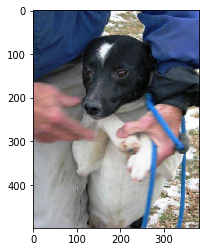

this is a dog


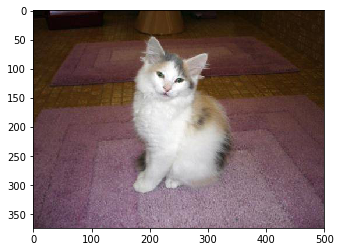

this is a cat


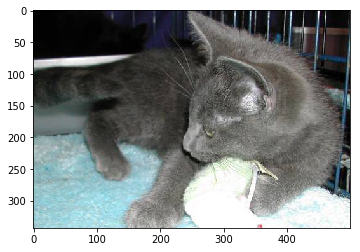

this is a dog


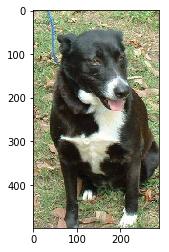

this is a dog


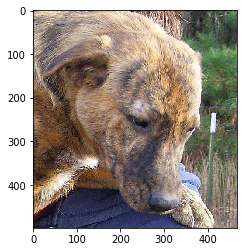

this is a cat


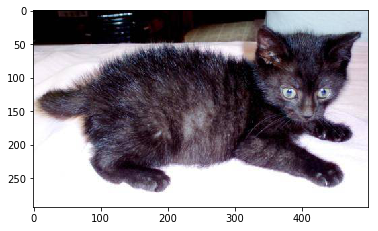

this is a cat


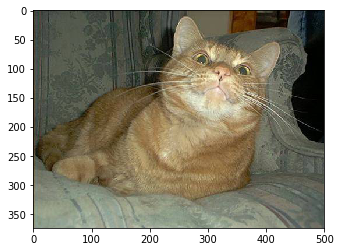

this is a dog


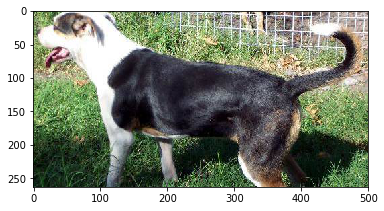

this is a cat


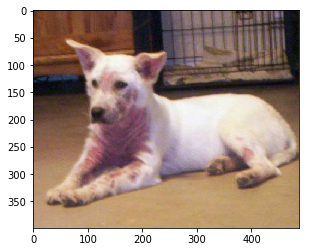

this is a dog


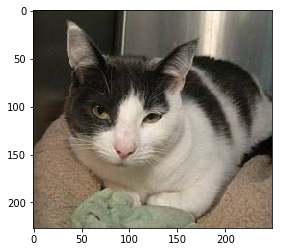

this is a cat


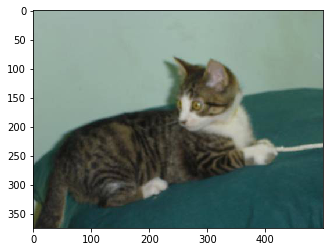

this is a cat


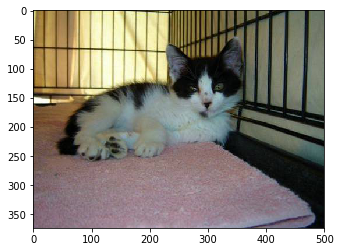

this is a cat


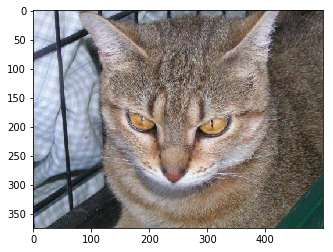

this is a cat


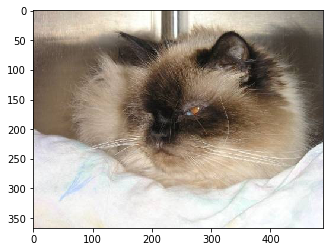

this is a dog


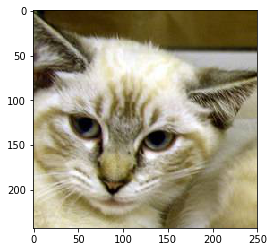

this is a dog


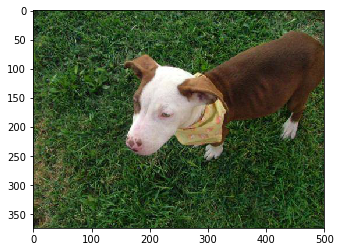

this is a dog


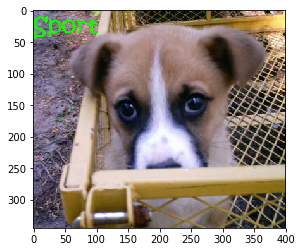

this is a dog


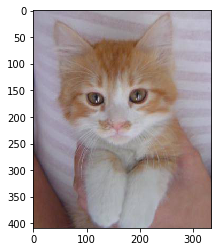

this is a dog


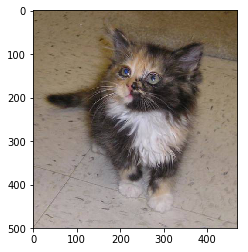

this is a dog


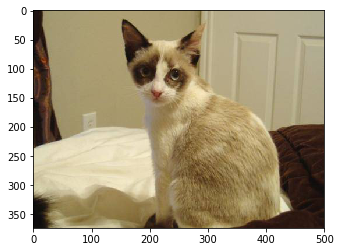

In [52]:
predictions = np.array(predictions)
for i in range(20):
    img = load_img(os.path.join(test_path, test_names[i]))
    if predictions[i] == 1: z='cat'
    elif predictions[i] == 2: z='dog'
    print('this is a ' + z)
    plt.imshow(img)
    plt.show()

In [46]:
from keras.models import model_from_json

In [47]:
json_model = model.to_json()

In [48]:
with open('E:\\Other Stuff\\model.json', 'w') as json_file:
    json_file.write(json_model)

In [49]:
model.save_weights('E:\\Other Stuff\\model.h5')

In [50]:
file2 = open('E:\\Other Stuff\\model.json', 'r')
load_model = file2.read()
file2.close()

In [51]:
model_2 = model_from_json(load_model)
model_2.load_weights('E:\\Other Stuff\\model.h5')

this is a cat


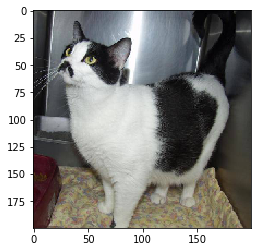

In [59]:
img = load_img(os.path.join(test_path, test_names[1200]), target_size=(200, 200))
test = img_to_array(img)
test = np.expand_dims(test, axis=0)
pred = model_2.predict(test)
if pred[0][0] == 1: z = 'cat'
elif pred[0][1] == 1: z='dog'
print('this is a '+ z)
plt.imshow(img)
plt.show()

In [58]:
pred

array([[1.0000000e+00, 1.4012853e-17]], dtype=float32)

This classifier could work better if we train this classifier longer by increasing epochs and steps per epochs. But i am so sorry my computer is still not able to work it through. It will take a lot of time to get good result if this classifier is trained by my computer. 